# Sentimental Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [8]:
plt.style.use('ggplot')

In [9]:
import os
os.getcwd()

'C:\\Users\\Dense'

In [10]:
os.chdir("C:\\Users\\Dense\\Documents")

In [11]:
os.getcwd()

'C:\\Users\\Dense\\Documents'

In [12]:
print(os.path.exists(os.path.join(os.getcwd(),'reviews.csv')))

True


In [13]:
#displays the entire rows in 'products.csv' data
#pd.set_option('display.max_rows', None)
#Import products.csv file from cwd
reviews = pd.read_csv('reviews.csv')
#Displays first five contents from the dataset
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
print(reviews.shape)

(568454, 10)


In [15]:
print(reviews.info())
#print(reviews.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [16]:
print(reviews.describe())

                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09  


In [17]:
print("The columns in reviews dataset are:", "\n", reviews.columns)
print("\n")

The columns in reviews dataset are: 
 Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')




In [18]:
print("The count for the columns in reviews dataset are:", "\n", reviews.count())
print("\n")
print("The unique count for the columns in reviews dataset are:", "\n", reviews.nunique())
print("\n")

The count for the columns in reviews dataset are: 
 Id                        568454
ProductId                 568454
UserId                    568454
ProfileName               568428
HelpfulnessNumerator      568454
HelpfulnessDenominator    568454
Score                     568454
Time                      568454
Summary                   568427
Text                      568454
dtype: int64


The unique count for the columns in reviews dataset are: 
 Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218415
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64




In [19]:
print("The datas in the column Score for Score dataset are: \n", reviews['Score'].unique())

The datas in the column Score for Score dataset are: 
 [5 1 4 2 3]


In [20]:
reviews.groupby('Score').Score.count().head()
#or, ax = reviews['Score'].value_counts().sort_index()

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

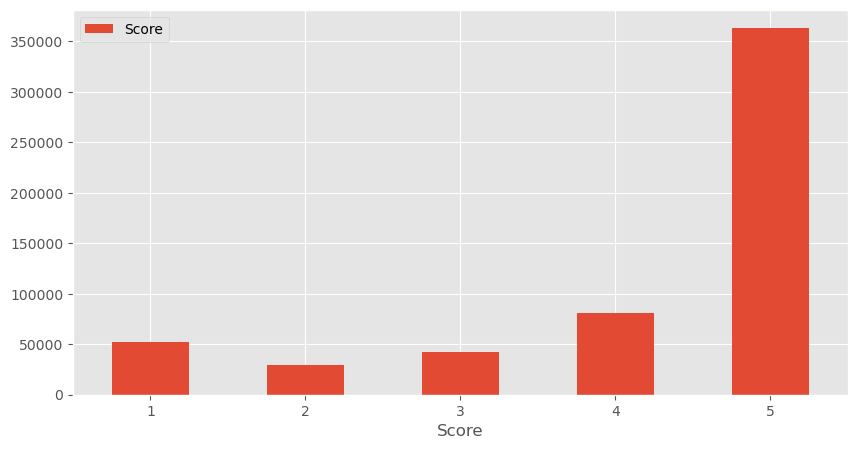

In [21]:
import pandas as pd
pd.DataFrame(reviews.groupby('Score').Score.count()).plot(kind = 'bar', figsize = (10,5))
plt.xticks(rotation = 0)
plt.show()
#OR
#ax = df['Score'].value_counts().sort_index() \
#    .plot(kind='bar',
#          title='Count of Reviews by Stars',
#          figsize=(10, 5))
#ax.set_xlabel('Review Stars')
#plt.show()

## Step 1. VADER(Valence Aware Dictionary and sEntiment Reasoner) Sentiment Scoring
This uses a "bag of words" approach: 
- Stop words are removed
- each word is scored and combined to a total score.

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dense\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [24]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [25]:
example = reviews['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [26]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
reviews.Id.head()

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

In [29]:
reviews_simplified = reviews.head(500)

In [30]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(reviews_simplified.iterrows(), total=len(reviews_simplified)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 527.87it/s]


In [31]:
list(res.items())[:5]

[(1, {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}),
 (2, {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}),
 (3, {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}),
 (4, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}),
 (5, {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468})]

In [32]:
#converting the dictionary of sentiment scores (res) into a DataFrame
#T- transpose
vaders = pd.DataFrame(res).T
vaders.head()
#vaders = vaders.reset_index().rename(columns={'index': 'Id'})
#vaders = vaders.merge(df, how='left')

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [33]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders.head()

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468


In [34]:
vaders = vaders.merge(reviews_simplified, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


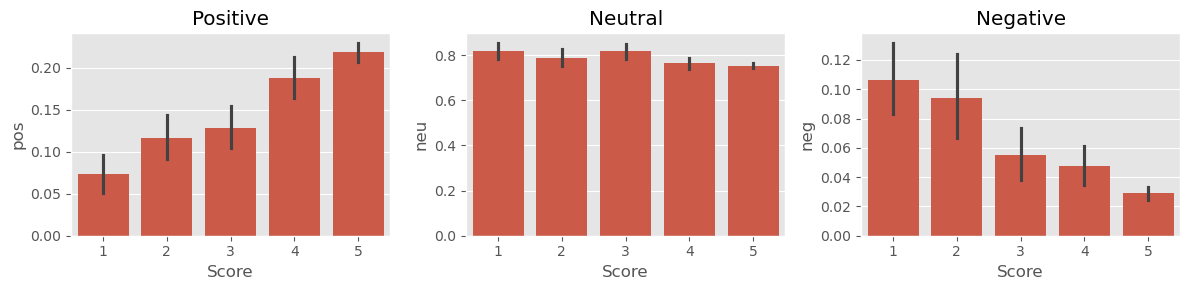

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [36]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Step 3. Roberta Pretrained Model
- Earlier model looks at each words seperately but does not work for human speech.
- Transformers can pick up sarcastic remarks as well.
- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [37]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [38]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Should return False for CPU-only

2.7.0+cpu
False


In [45]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [40]:
!pip install hf_xet

In [41]:
import torch
print(torch.__version__)
print(torch.__file__)


2.7.0+cpu
C:\Users\Dense\anaconda3\Lib\site-packages\torch\__init__.py


In [42]:
!pip install --no-deps torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [43]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


In [44]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [48]:
# Run for Roberta Model
#more powerful than the Vader model
#encoding the text #pt(pytorch) #taking the text and putting it in 1s and 0s embedding tht the model will understand
encoded_text = tokenizer(example, return_tensors='pt')
#run model on the encoded text
output = model(**encoded_text)
#convert from tensor to numpy to store it locally
scores = output[0][0].detach().numpy()
#apply softmax layer to the new numpy scores #gives array of neg,neu,pos scores without label
scores = softmax(scores)
#convert to dictionary to give it labels
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687466, 'roberta_pos': 0.0029573692}


In [49]:
#same thing as above but using function
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [54]:
#prints above function
polarity_scores_roberta(text)

{'roberta_neg': 0.0024397594,
 'roberta_neu': 0.011327231,
 'roberta_pos': 0.986233}

In [56]:
#combine both vader results and roberta results
{**vader_result_rename, **roberta_result}

{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.0024397594,
 'roberta_neu': 0.011327231,
 'roberta_pos': 0.986233}

In [52]:
#iterate over each reviews and not just one(example)
res = {}
for i, row in tqdm(reviews_simplified.iterrows(), total=len(reviews_simplified)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        #store into dictionary
        res[myid] = both
        #to fix runtime exception #to skip big sizes #size running on cpu #works well for running it in gpu
    except RuntimeError:
        print(f'Broke for id {myid}')

 16%|█▋        | 82/500 [01:09<06:26,  1.08it/s]

Broke for id 83


 37%|███▋      | 186/500 [02:31<04:25,  1.18it/s]

Broke for id 187


100%|██████████| 500/500 [07:18<00:00,  1.14it/s]


In [ ]:
polarity_scores_roberta(text)

In [59]:
#transpose and merge the results
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(reviews_simplified, how='left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [60]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

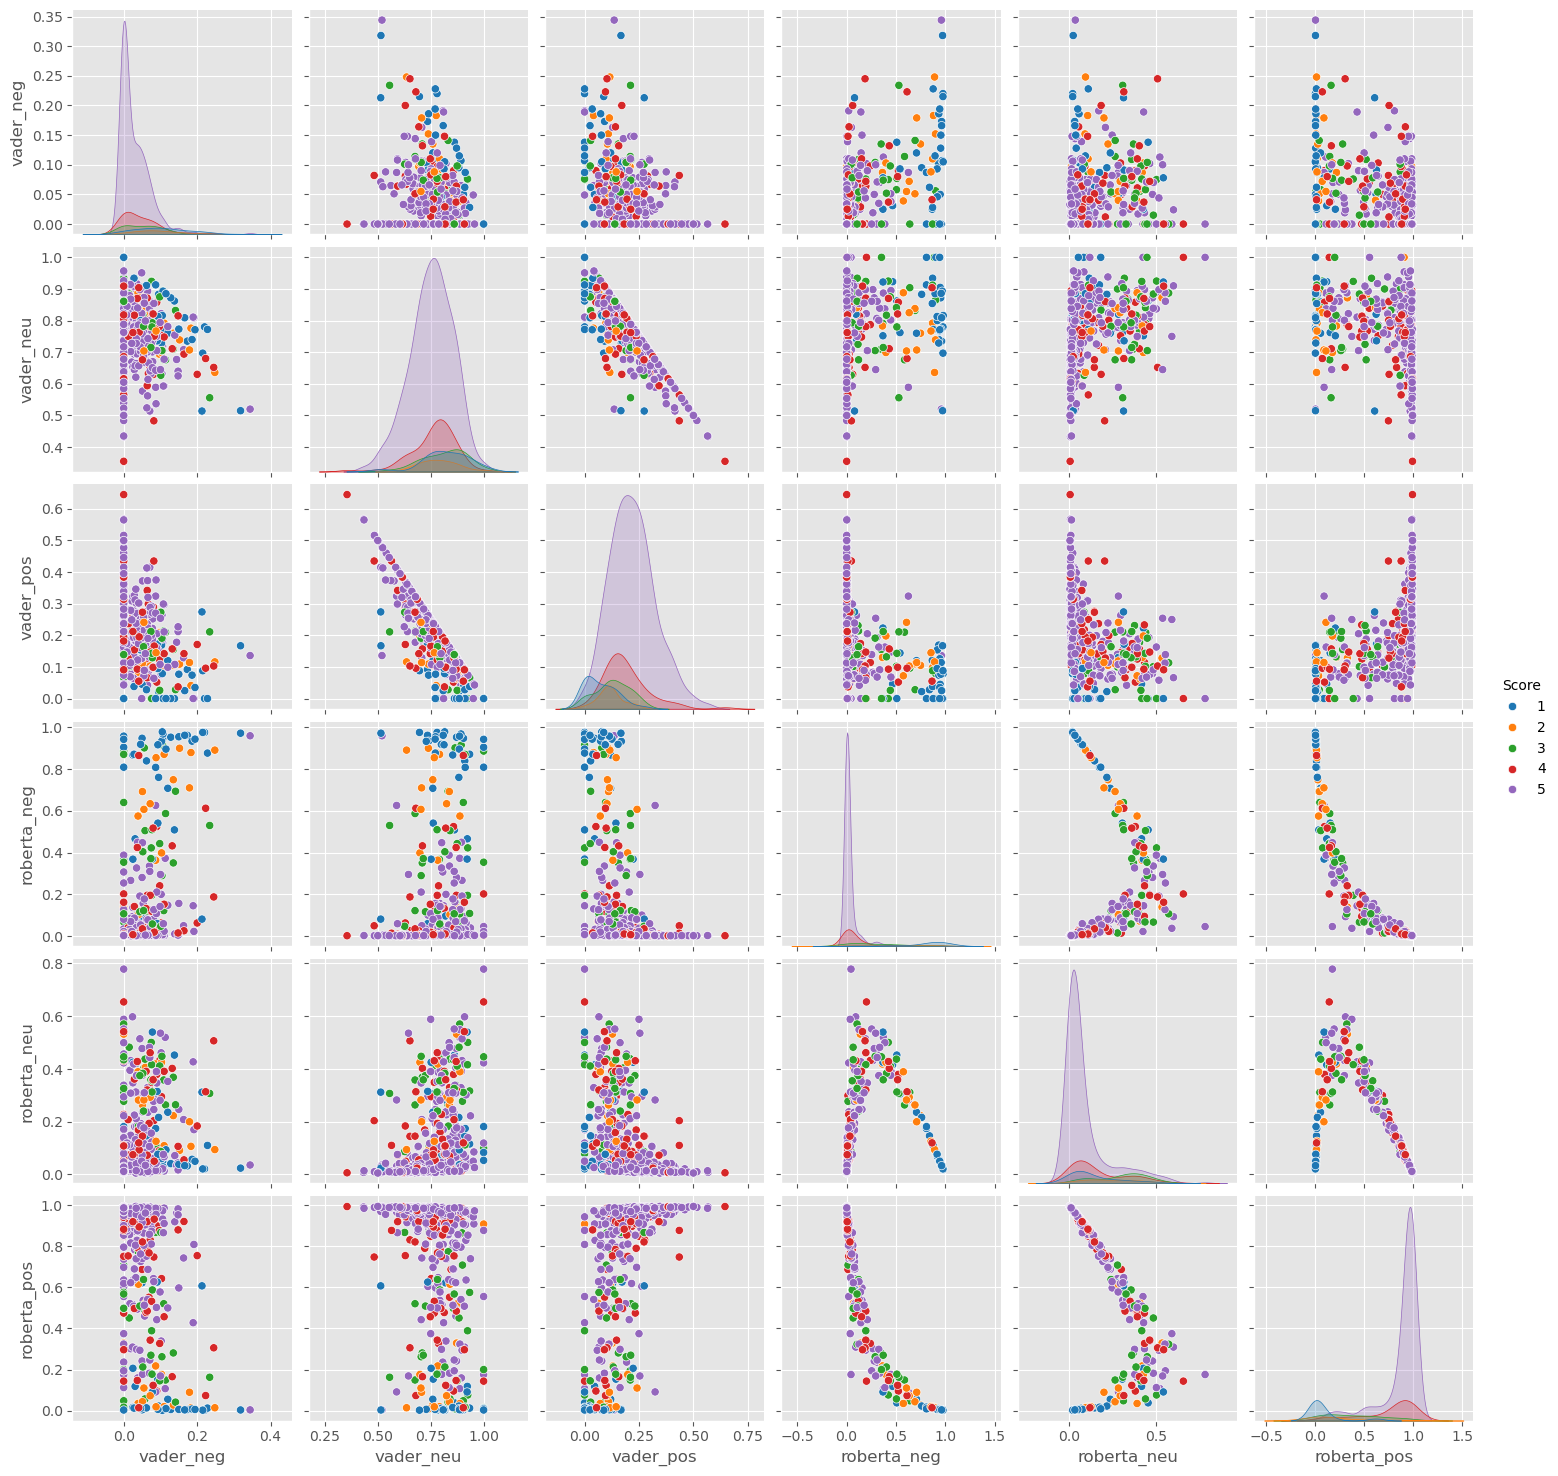

In [61]:
#to compare all the results 
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [62]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [63]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [64]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [65]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

### Transformers pipeline
- Quick & easy way to run sentiment predictions

In [70]:
from transformers import pipeline
#automatically download ther default model and embeddings for this pipeline
sent_pipeline = pipeline("sentiment-analysis",framework="pt")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [71]:
#above code is to download and run the model

In [72]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [73]:
sent_pipeline('You are so talented and great that you ruined your concert on your first day! Well done!')

[{'label': 'POSITIVE', 'score': 0.9815508127212524}]

In [74]:
#the above text was sarcastic and negative but the model didnt catch it

In [85]:
pip install sentencepiece


   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 10.2/992.0 kB ? eta -:--:--
    -------------------------------------- 20.5/992.0 kB 217.9 kB/s eta 0:00:05
    -------------------------------------- 20.5/992.0 kB 217.9 kB/s eta 0:00:05
   - ------------------------------------- 41.0/992.0 kB 217.9 kB/s eta 0:00:05
   -- ------------------------------------ 61.4/992.0 kB 326.1 kB/s eta 0:00:03
   --- ---------------------------------- 102.4/992.0 kB 392.2 kB/s eta 0:00:03
   ----- -------------------------------- 143.4/992.0 kB 472.1 kB/s eta 0:00:02
   ------- ------------------------------ 184.3/992.0 kB 529.1 kB/s eta 0:00:02
   --------- ---------------------------- 235.5/992.0 kB 600.7 kB/s eta 0:00:02
   ------------ ------------------------- 337.9/992.0 kB 698.7 kB/s eta 0:00:01
   --------------- ---------------------- 399.4/992.0 kB 778.2 kB

In [93]:
from transformers import AutoModel

model = AutoModel.from_pretrained("cardiffnlp/twitter-roberta-base-irony", force_download=True)

config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

C:\Users\Dense\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dense\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-irony. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-irony and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [99]:
pip install tf-keras --upgrade

  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tf_keras-2.19.0-py3-none-any.whl (1.7 MB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
  Rolling back uninstall of tensorflow
  Moving to c:\users\dense\anaconda3\lib\site-packages\tensorflow-2.18.0.dist-info\
   from C:\Users\Dense\anaconda3\Lib\site-packages\~ensorflow-2.18.0.dist-info
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dense\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [101]:
pip install torch transformers

In [107]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "cardiffnlp/twitter-roberta-base-irony"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

inputs = tokenizer("You are so talented and great that you ruined your concert on your first day! Well done!", return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    print(torch.softmax(outputs.logits, dim=1))

tensor([[0.0222, 0.9778]])


In [104]:
#above loaded componenets manually

In [108]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-irony"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Process text
text = "You are so talented and great that you ruined your concert on your first day! Well done!"
inputs = tokenizer(text, return_tensors="pt")

# Get predictions
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Interpret results
probs = torch.softmax(logits, dim=1)[0]
predicted_class = torch.argmax(logits).item()
label_names = ["not_irony", "irony"]  # This model's actual labels

print(f"Probabilities: {probs.tolist()}")
print(f"Predicted: {label_names[predicted_class]} (confidence: {probs[predicted_class]:.2%})")

Probabilities: [0.02222752384841442, 0.9777724146842957]
Predicted: irony (confidence: 97.78%)
